# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Seed set for sanity checks
np.random.seed(1186)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
# Call API weather check
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='
count = 0
count2 = 1

# Empty lists to populate
clouds = []
countries = []
humidity = []
lat = []
long = []
temp = []
wind = []
date = []
city_list = []

print(f'Beginning Data Retrieval')
print(f'--------------------------------------------')

for city in cities:
    try:
        response = requests.get(base_url + city).json()
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        city_list.append(city)
        print(f"Processing record {count} of Set {count2} | {city}")
        count=count+1
        if count>=50:
            count=0
            count2=count2+1
    except:
        print("No such city, skipping this one...")
    
    
print("----------------------API Pull Complete----------------------")

Beginning Data Retrieval
--------------------------------------------
Processing record 0 of Set 1| clifton
Processing record 1 of Set 1| vicuna
Processing record 2 of Set 1| pevek
Processing record 3 of Set 1| cape town
Processing record 4 of Set 1| puerto ayora
Processing record 5 of Set 1| wanning
Processing record 6 of Set 1| oranjemund
No such city, skipping this one...
Processing record 7 of Set 1| kaduqli
Processing record 8 of Set 1| tondi
Processing record 9 of Set 1| paso de carrasco
Processing record 10 of Set 1| nome
Processing record 11 of Set 1| mataura
Processing record 12 of Set 1| hithadhoo
Processing record 13 of Set 1| beringovskiy
Processing record 14 of Set 1| port elizabeth
Processing record 15 of Set 1| callaway
Processing record 16 of Set 1| isangel
Processing record 17 of Set 1| stornoway
Processing record 18 of Set 1| mar del plata
Processing record 19 of Set 1| albany
Processing record 20 of Set 1| busselton
Processing record 21 of Set 1| hilo
Processing reco

Processing record 42 of Set 4| san cristobal
Processing record 43 of Set 4| abha
No such city, skipping this one...
Processing record 44 of Set 4| iqaluit
Processing record 45 of Set 4| urucara
Processing record 46 of Set 4| buckingham
Processing record 47 of Set 4| port alfred
Processing record 48 of Set 4| korla
Processing record 49 of Set 4| rundu
Processing record 0 of Set 5| souillac
Processing record 1 of Set 5| las margaritas
Processing record 2 of Set 5| walvis bay
Processing record 3 of Set 5| ulladulla
No such city, skipping this one...
Processing record 4 of Set 5| turan
Processing record 5 of Set 5| dali
Processing record 6 of Set 5| santa catarina de tepehuanes
Processing record 7 of Set 5| lavrentiya
Processing record 8 of Set 5| saldanha
Processing record 9 of Set 5| vichy
Processing record 10 of Set 5| yumen
Processing record 11 of Set 5| ilulissat
Processing record 12 of Set 5| torbay
Processing record 13 of Set 5| tatawin
Processing record 14 of Set 5| coihaique
No su

Processing record 30 of Set 8| luau
Processing record 31 of Set 8| santa marta
Processing record 32 of Set 8| santana
Processing record 33 of Set 8| dicabisagan
Processing record 34 of Set 8| marathon
Processing record 35 of Set 8| smolenka
Processing record 36 of Set 8| mutuipe
Processing record 37 of Set 8| kahului
Processing record 38 of Set 8| vorontsovka
Processing record 39 of Set 8| senneterre
Processing record 40 of Set 8| mandalgovi
Processing record 41 of Set 8| onda
Processing record 42 of Set 8| pandan
Processing record 43 of Set 8| cabo san lucas
Processing record 44 of Set 8| kamenka
Processing record 45 of Set 8| scarborough
Processing record 46 of Set 8| nokaneng
Processing record 47 of Set 8| nabire
No such city, skipping this one...
Processing record 48 of Set 8| comodoro rivadavia
Processing record 49 of Set 8| sinazongwe
Processing record 0 of Set 9| peski
Processing record 1 of Set 9| khuzdar
Processing record 2 of Set 9| iskitim
No such city, skipping this one...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
weather_lists = {
             "Cloudiness":clouds, 
             "Country":countries,
             "Humidity":humidity,
             "Latitude":lat,
             "Longitude":long,
             "Temperature (F)":temp,
             "Wind Speed":wind,
             "Date": date,
             "City": city_list,
}

weather_df = pd.DataFrame(weather_lists)
weather_df.to_csv('cities.csv', index = True, index_label = 'city_id')
weather_df

,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature (F),Wind Speed,Date,City
0,90,US,71,40.8584,-74.1638,57.20,23.02,1619032690,clifton
1,0,CL,68,-30.0319,-70.7081,66.20,14.97,1619032816,vicuna
2,12,RU,68,69.7008,170.3133,20.77,17.83,1619032640,pevek
3,0,ZA,77,-33.9258,18.4232,66.20,9.22,1619032572,cape town
4,75,EC,78,-0.7393,-90.3518,80.60,11.50,1619032817,puerto ayora
...,...,...,...,...,...,...,...,...,...
563,86,KZ,64,51.6667,75.3667,33.24,10.45,1619033038,ekibastuz
564,95,RU,94,57.3064,88.1667,20.32,4.47,1619033039,teguldet
565,14,ID,88,-7.7431,110.5794,71.62,2.80,1619033039,wedi
566,68,RU,94,53.6667,124.8000,30.87,5.08,1619033039,taldan


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
weather_df.describe()

,Cloudiness,Humidity,Latitude,Longitude,Temperature (F),Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,56.882042,69.003521,21.295663,19.725843,59.542799,8.215405,1.619033e+09
std,39.376649,21.960603,33.342937,89.807036,21.542607,5.482441,9.720367e+01
min,0.000000,6.000000,-54.800000,-179.166700,-9.510000,0.560000,1.619033e+09
25%,15.000000,56.000000,-6.295625,-59.718150,45.000000,4.000000,1.619033e+09
50%,75.000000,73.000000,25.942500,27.527650,64.400000,6.910000,1.619033e+09
75%,99.000000,87.000000,50.270575,96.396375,77.785000,11.500000,1.619033e+09
max,100.000000,100.000000,78.218600,179.316700,95.000000,30.850000,1.619033e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

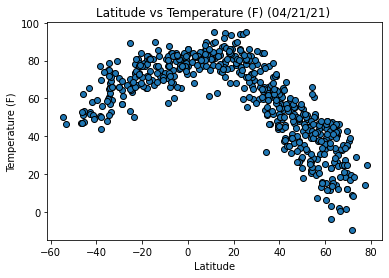

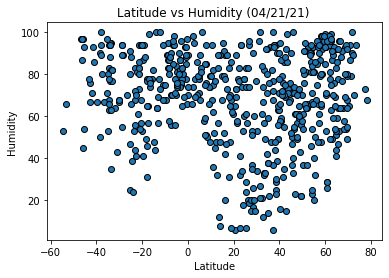

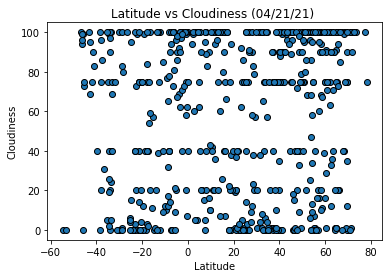

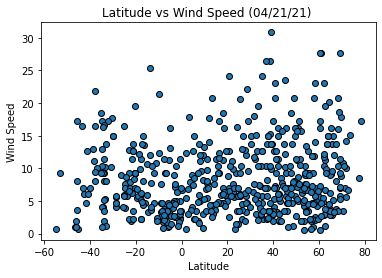

In [132]:
y_values = ['Temperature (F)', 'Humidity', 'Cloudiness', 'Wind Speed']
for y_axis in y_values:
    x = weather_df['Latitude']
    y = weather_df[y_axis]
    plt.scatter(x,y, edgecolor='black')
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    plt.title('Latitude vs ' + y_axis + ' (%s) ' % time.strftime("%x"))
    plt.show()

## Linear Regression

In [98]:
# Split between northern and southern hemisphere
north = weather_df.loc[(weather_df['Latitude']>0)]
south = weather_df.loc[(weather_df['Latitude']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Fit line eq: y = -0.09x + 5.58
R-squared: -0.8733705960932904


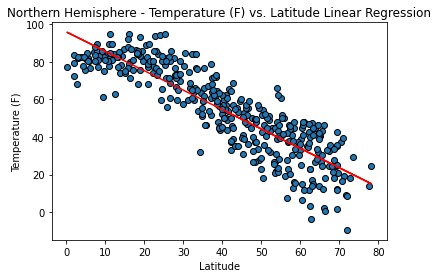

Fit line eq: y = -0.09x + 5.58
R-squared: 0.14873094771407241


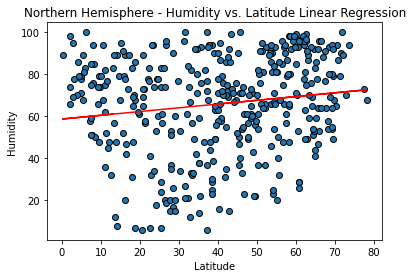

Fit line eq: y = -0.09x + 5.58
R-squared: 0.11773117892261749


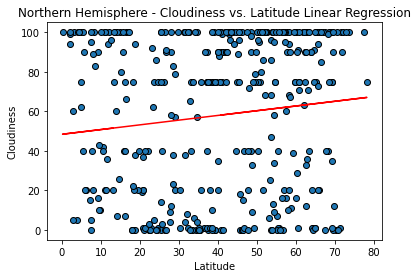

Fit line eq: y = -0.09x + 5.58
R-squared: 0.07704427774517203


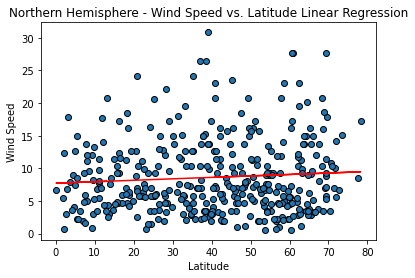

Fit line eq: y = 0.56x + 82.37
R-squared: 0.7236444638162317


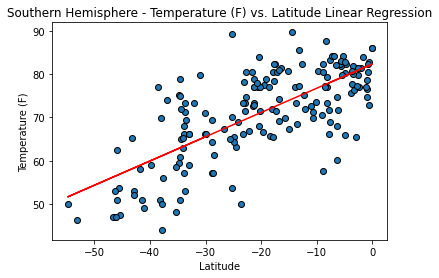

Fit line eq: y = 0.1x + 77.88
R-squared: 0.08520682970485212


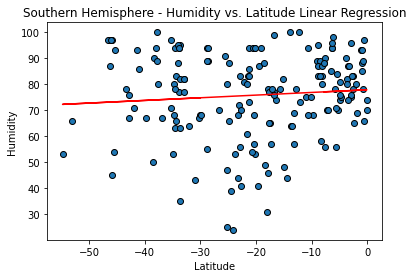

Fit line eq: y = 0.18x + 58.15
R-squared: 0.0641845230670331


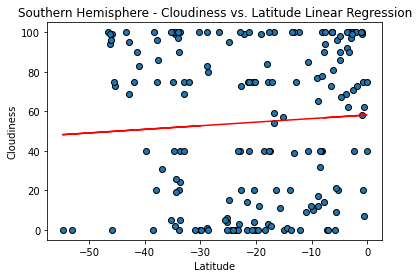

Fit line eq: y = -0.09x + 5.58
R-squared: -0.23826041991436747


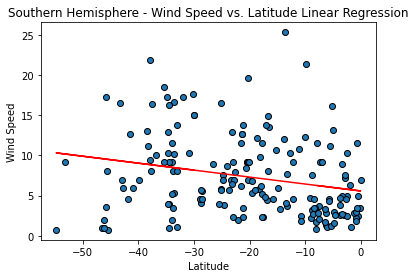

In [122]:
# Northern Hemisphere Regression Lines
y_values = ['Temperature (F)', 'Humidity', 'Cloudiness', 'Wind Speed']
for y_axis in y_values:
    x = north['Latitude']
    y = north[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolor='black')
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    plt.title('Northern Hemisphere - ' + y_axis + ' vs. Latitude Linear Regression')
    print(f'Fit line eq: {line_eq2}')
    print(f'R-squared: {rvalue}')
    plt.show()
    
# Southern Hemisphere Regression Lines
for y_axis in y_values:
    x = south['Latitude']
    y = south[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolor = 'black')
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    plt.title('Southern Hemisphere - ' + y_axis + ' vs. Latitude Linear Regression')
    print(f'Fit line eq: {line_eq2}')
    print(f'R-squared: {rvalue}')
    plt.show()